In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from read import read_file
from describe import create_var_dict, diff_in_mean, x_dist, comparison_all_values
from process import check_missing_value, fill_in
from create_dummy import discretize, create_dummy
from loop import extract_features, clf_loop
from IPython.display import display

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

Step 1: Read Data

In [2]:
df = read_file("credit-data.csv")
display(df)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,60644,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,60637,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,60601,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,60601,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,60625,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,60629,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,60637,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,60625,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,60804,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,60629,0,0.606291,23684.0,9,0,4,0,2.0


Step 2: Explore Data

y: SeriousDlqin2yrs
x1: RevolvingUtilizationOfUnsecuredLines
x2: age
x3: zipcode
x4: NumberOfTime30-59DaysPastDueNotWorse
x5: DebtRatio
x6: MonthlyIncome
x7: NumberOfOpenCreditLinesAndLoans
x8: NumberOfTimes90DaysLate
x9: NumberRealEstateLoansOrLines
x10: NumberOfTime60-89DaysPastDueNotWorse
x11: NumberOfDependents


,age,MonthlyIncome,NumberOfDependents
SeriousDlqin2yrs,,,
0,52.751375,6747.837774,0.743417
1,45.926591,5630.826493,0.948208


,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
SeriousDlqin2yrs,,,
0,0.280109,0.126666,0.135225
1,2.388490,1.828047,2.091362


,RevolvingUtilizationOfUnsecuredLines,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
SeriousDlqin2yrs,,,,
0,6.168855,357.151168,8.493620,1.020368
1,4.367282,295.121066,7.882306,0.988530


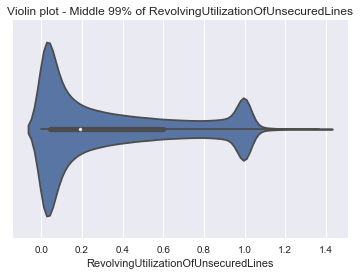

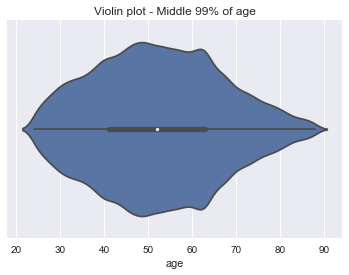

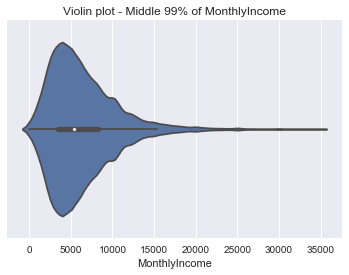

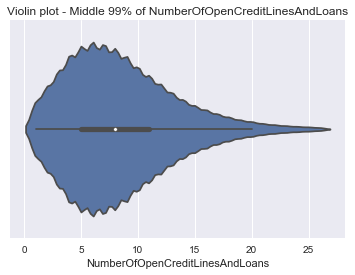

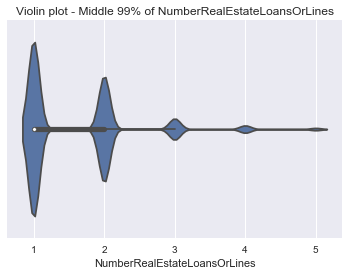

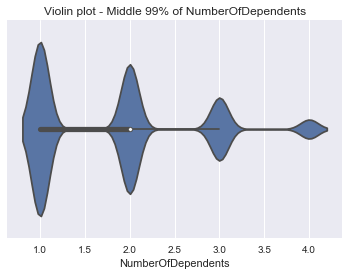

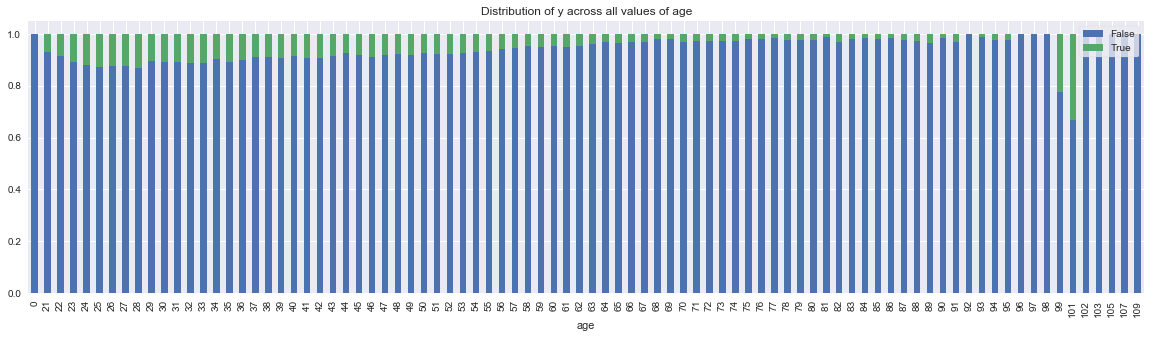

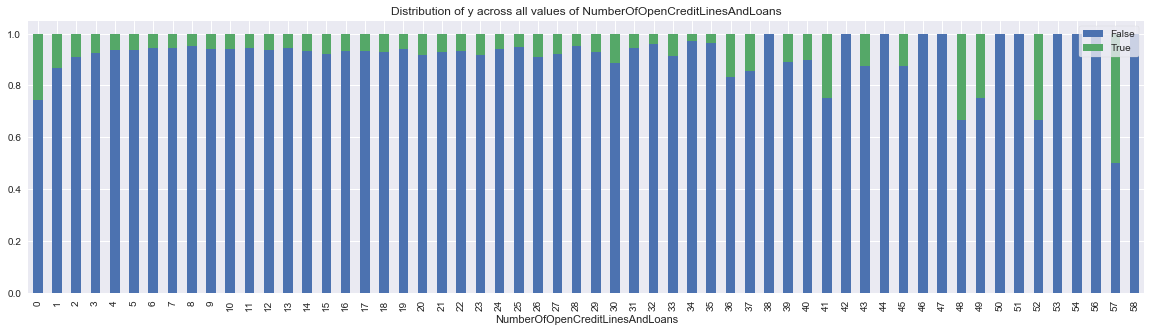

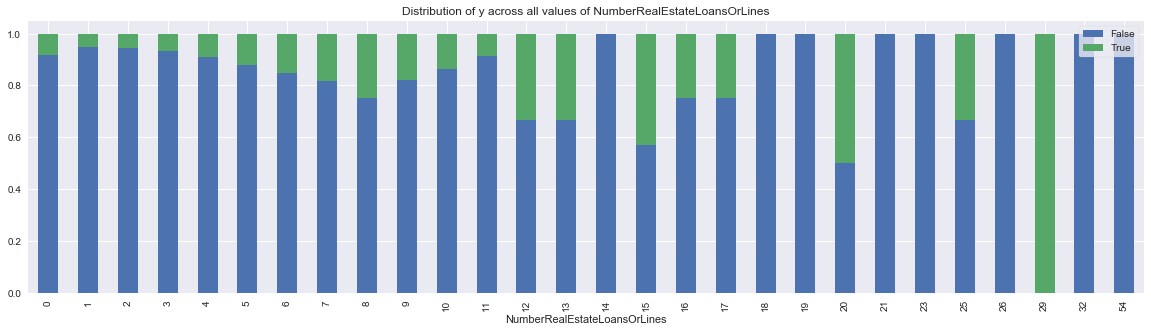

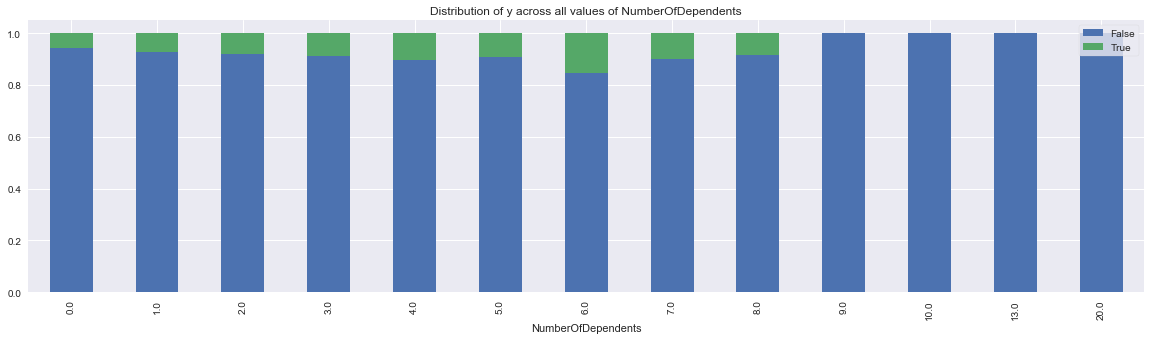

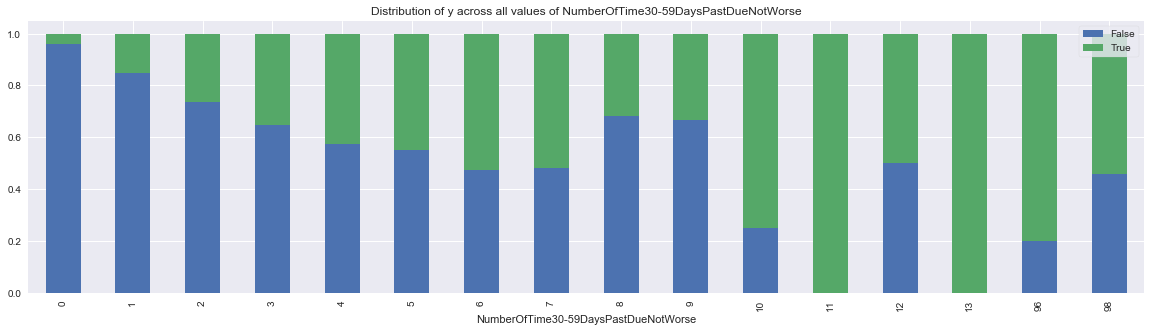

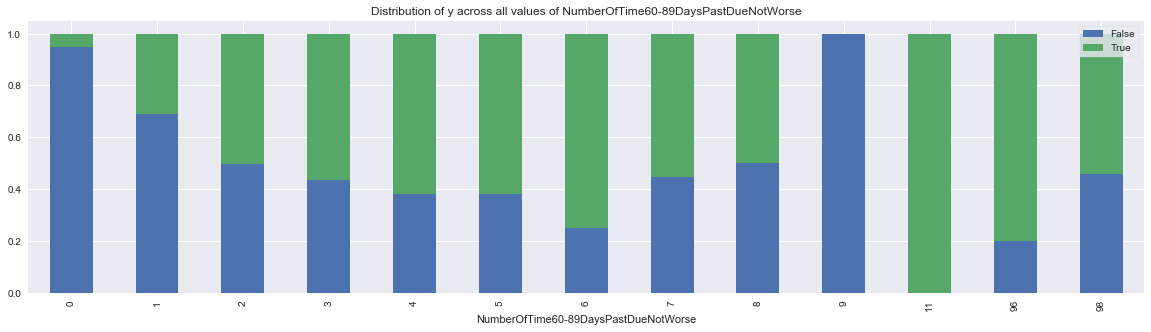

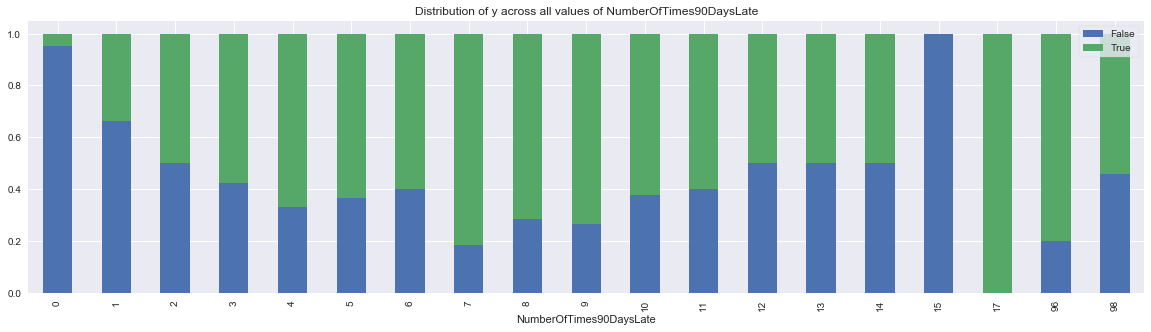

In [3]:
d = create_var_dict(df, 2)  #independent variable is in the 2nd column

    #Chart 1
compare = [[2,6,11],[4,10,8],[1,5,7,9]]
for lst in compare:
    a = diff_in_mean(df, lst, d)
    display(a)

    #Chart 2
x_dist(df,[1,2,6,7,9,11],d)

    #Chart 3
comparison_all_values(df, [2,7,9,11,4,10,8],d)

#See write-up for findings from the charts.

Step 3: Fill missing value

In [4]:
check_missing_value(df)
fill_in(df, 6, d, 'mean')
fill_in(df, 11, d, 'mean')

MonthlyIncome has missing values.
NumberOfDependents has missing values.


Step 4: Create dummy variables

In [5]:
for var in [2,6]:
    headers = discretize(df, var, d, 4)
    df = create_dummy(df, var, d, headers)
display(d)

{'x1': 'RevolvingUtilizationOfUnsecuredLines',
 'x10': 'NumberOfTime60-89DaysPastDueNotWorse',
 'x11': 'NumberOfDependents',
 'x12': 'age: 0.0 to 25.0%tile',
 'x13': 'age: 25.0 to 50.0%tile',
 'x14': 'age: 50.0 to 75.0%tile',
 'x15': 'age: 75.0 to 100.0%tile',
 'x16': 'MonthlyIncome: 0.0 to 25.0%tile',
 'x17': 'MonthlyIncome: 25.0 to 50.0%tile',
 'x18': 'MonthlyIncome: 50.0 to 75.0%tile',
 'x19': 'MonthlyIncome: 75.0 to 100.0%tile',
 'x2': 'age',
 'x3': 'zipcode',
 'x4': 'NumberOfTime30-59DaysPastDueNotWorse',
 'x5': 'DebtRatio',
 'x6': 'MonthlyIncome',
 'x7': 'NumberOfOpenCreditLinesAndLoans',
 'x8': 'NumberOfTimes90DaysLate',
 'x9': 'NumberRealEstateLoansOrLines',
 'y': 'SeriousDlqin2yrs'}

Step 5 & 6: Classifier & Metrics

***Contrary to expectation, SVM takes too long to execute; due to time constraint, it is not included in the models_to_run. Please see the write for further discussion.***

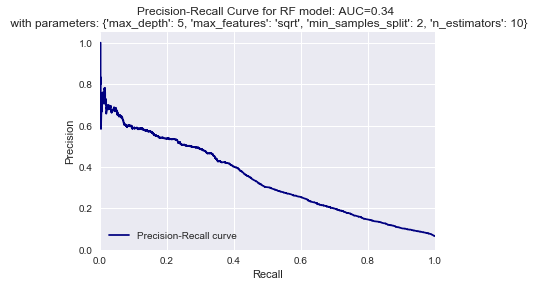

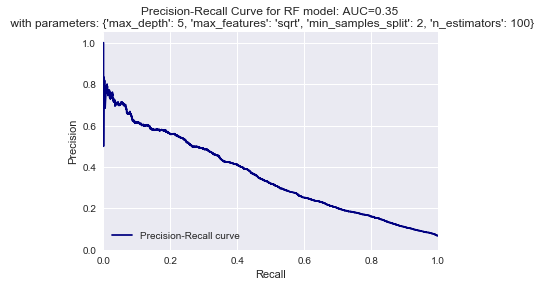

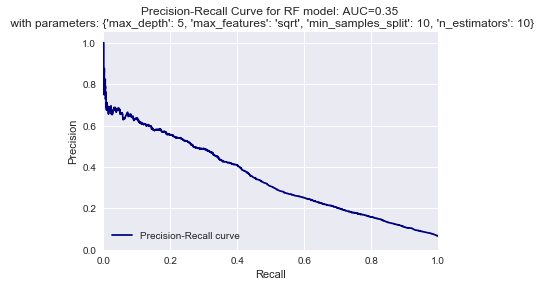

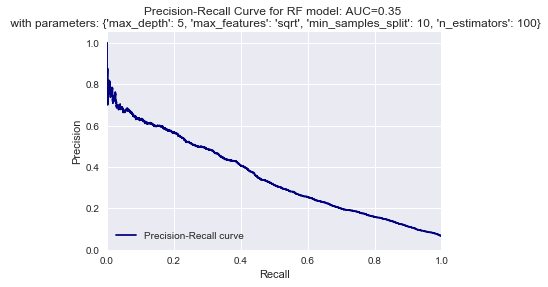

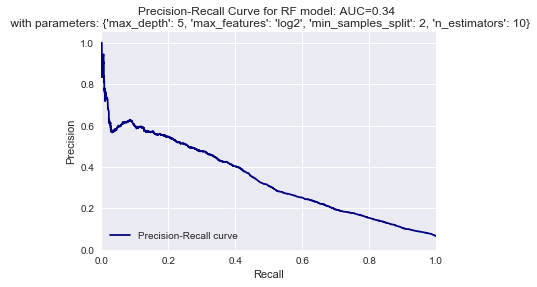

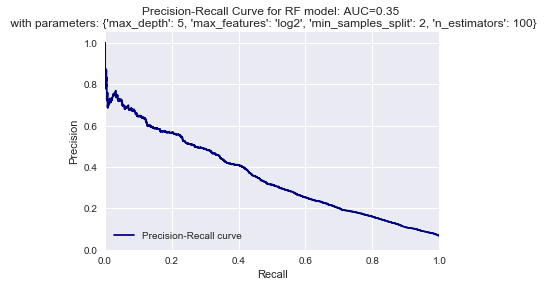

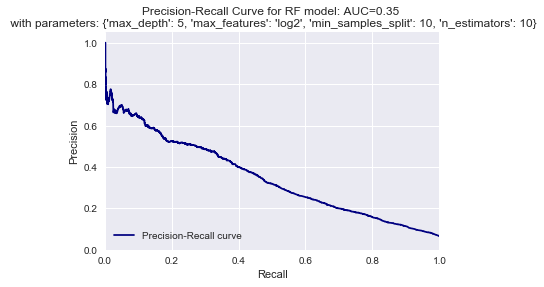

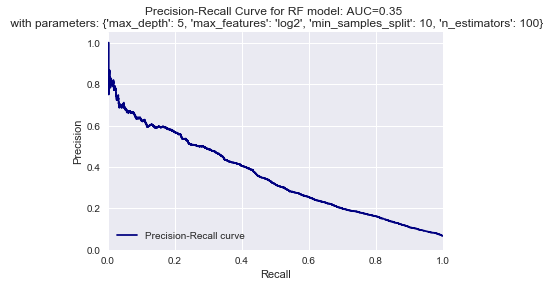

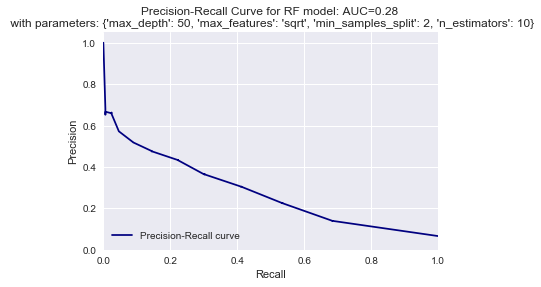

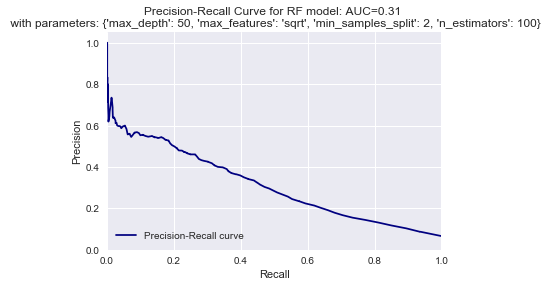

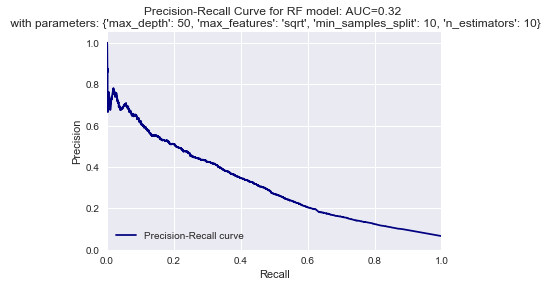

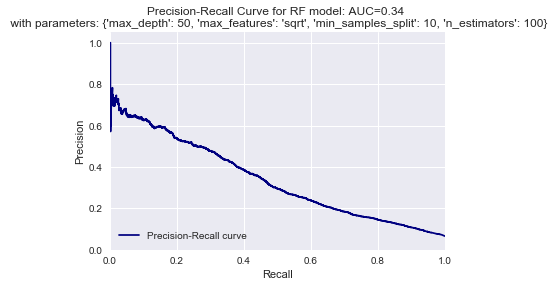

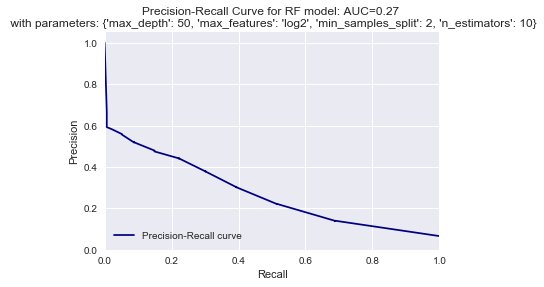

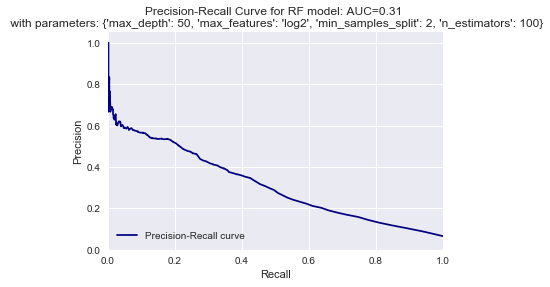

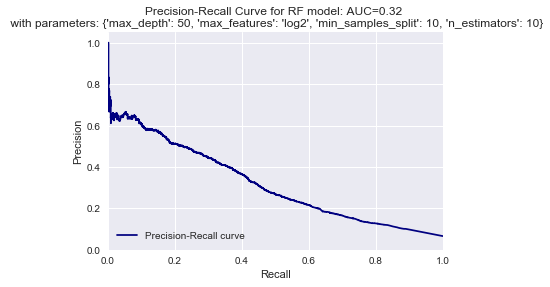

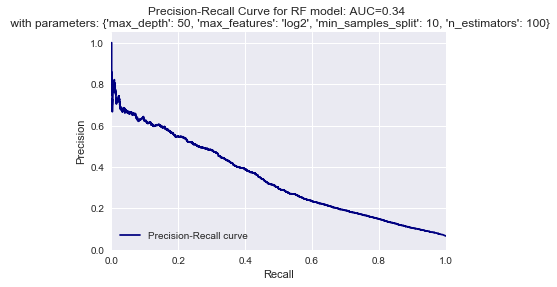

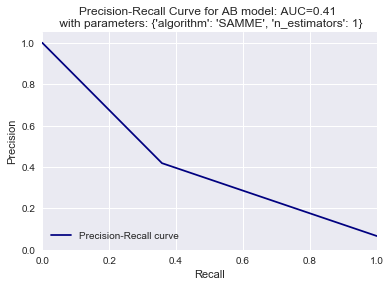

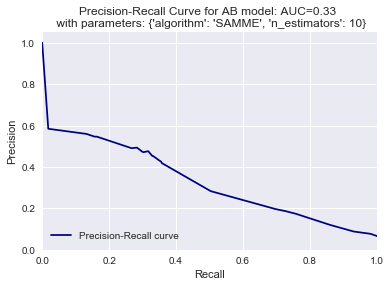

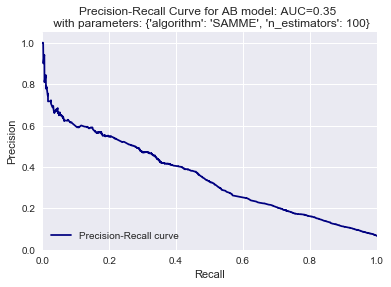

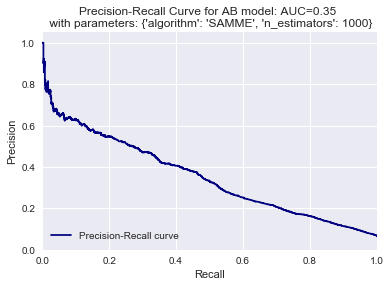

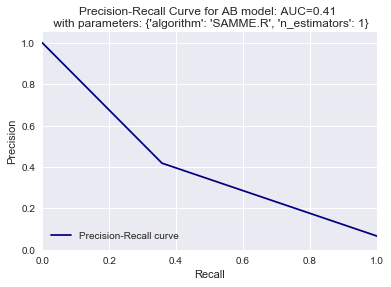

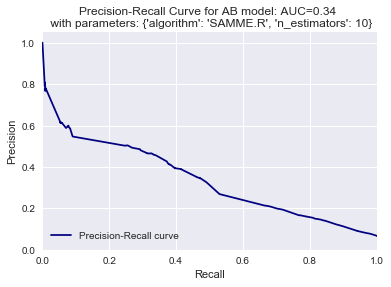

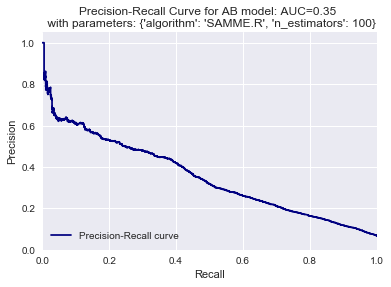

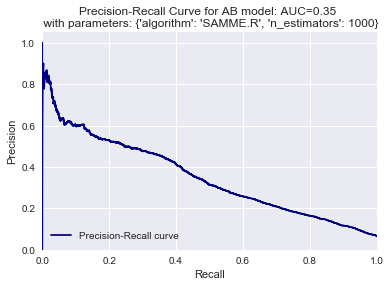

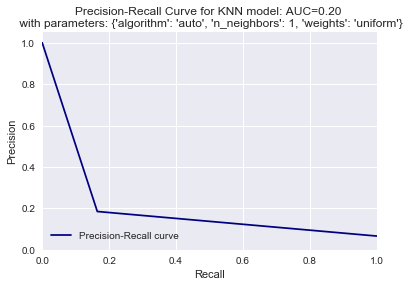

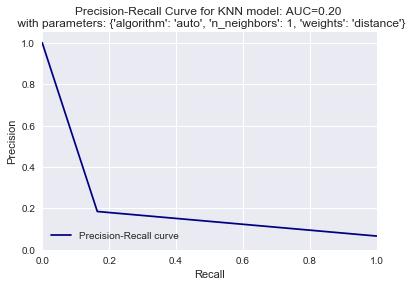

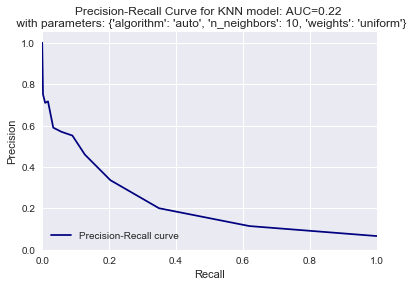

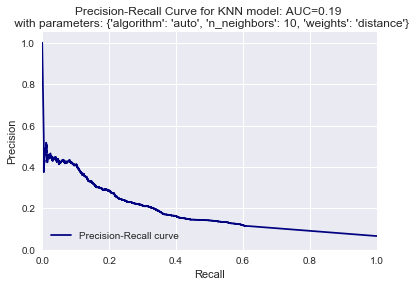

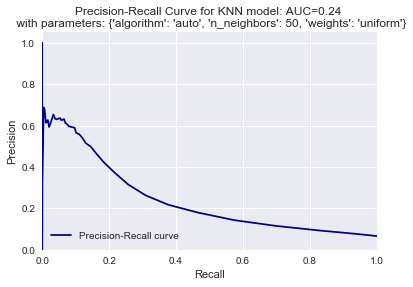

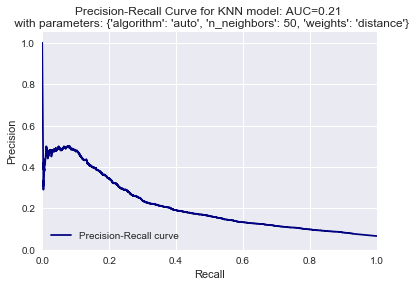

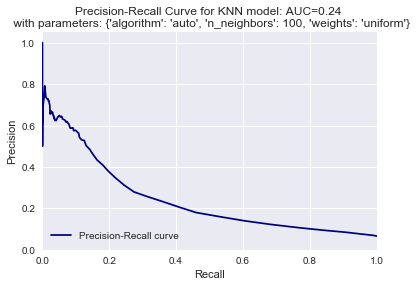

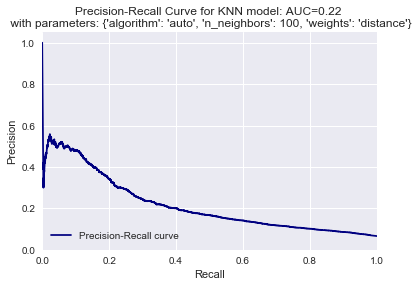

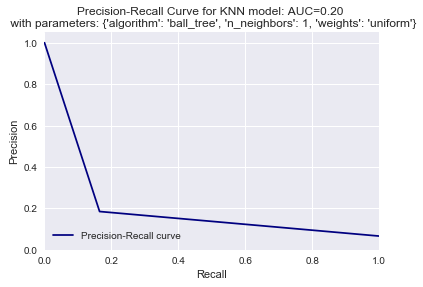

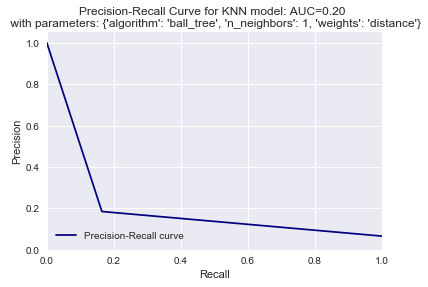

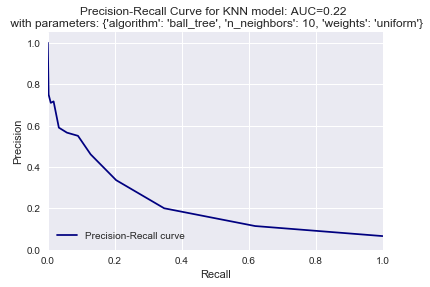

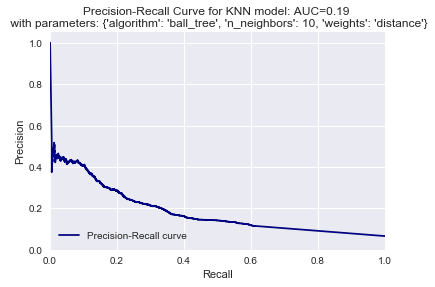

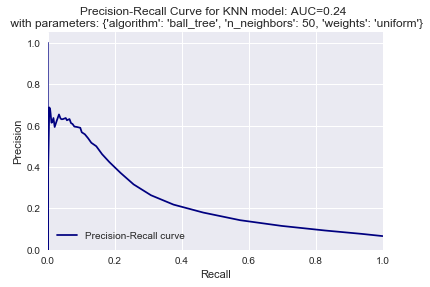

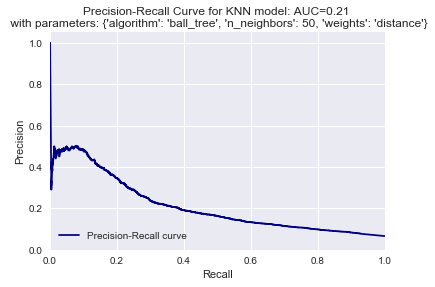

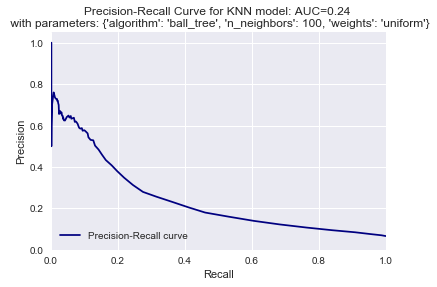

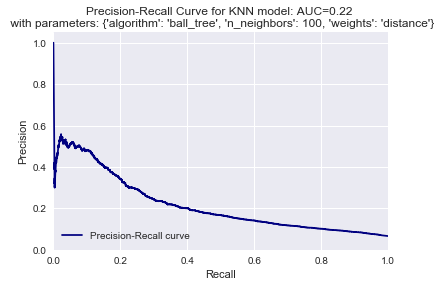

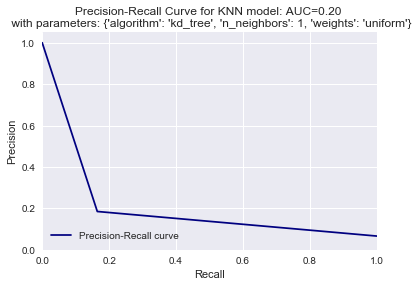

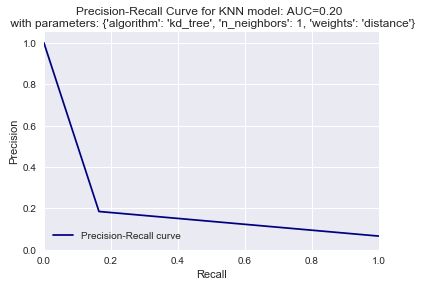

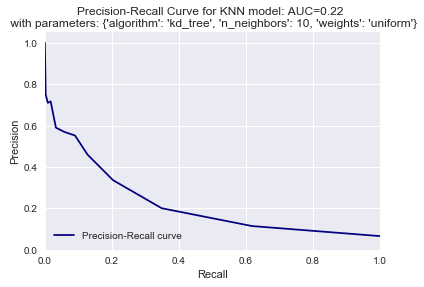

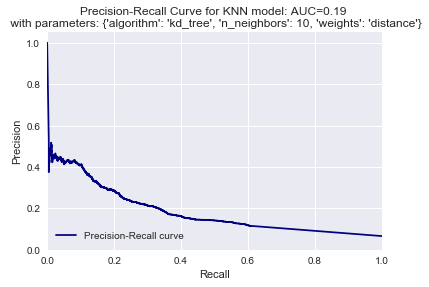

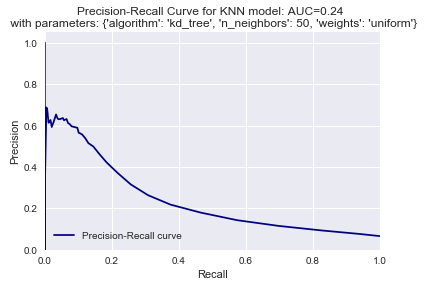

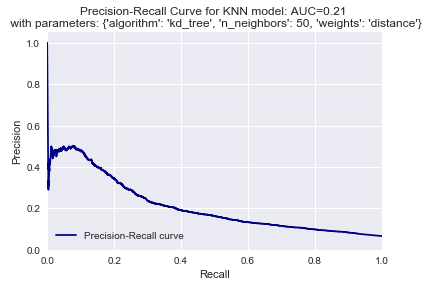

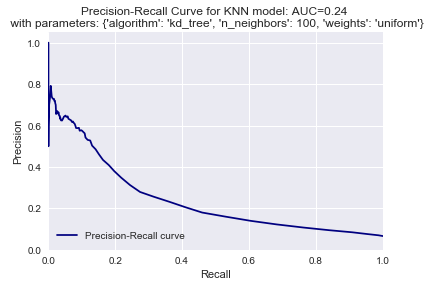

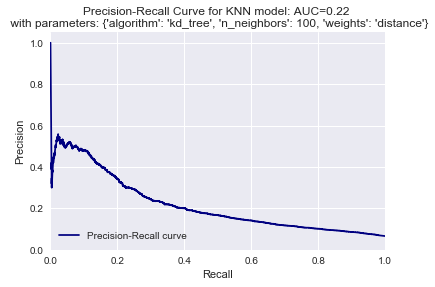

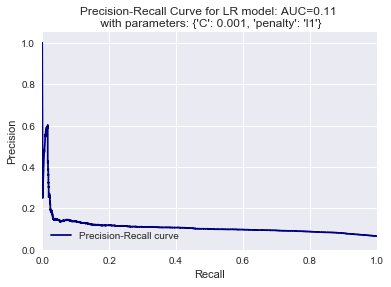

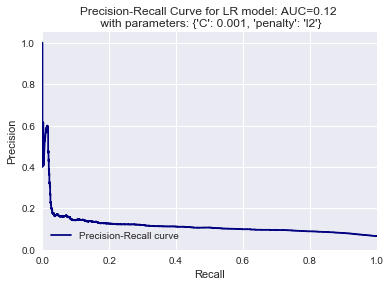

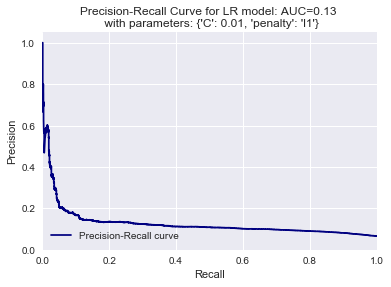

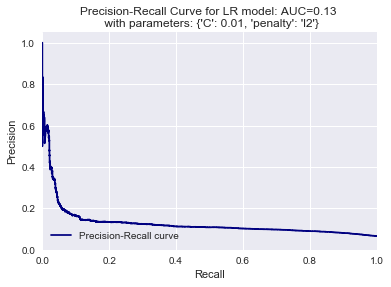

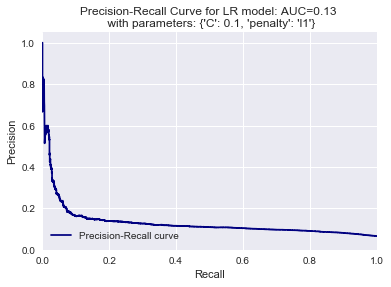

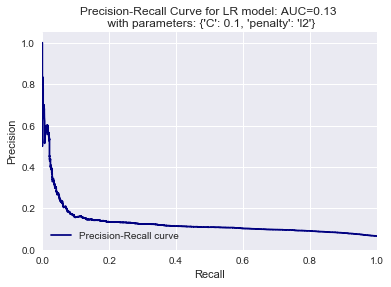

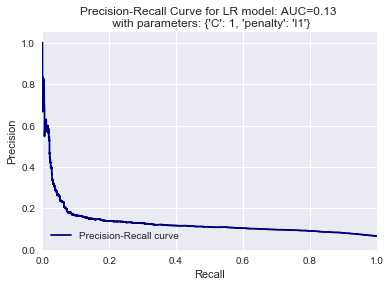

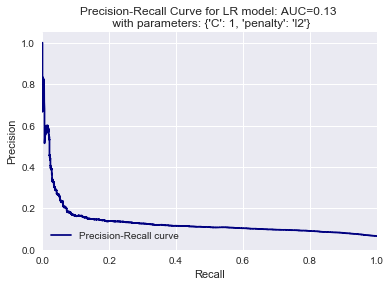

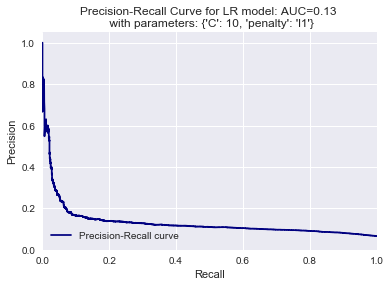

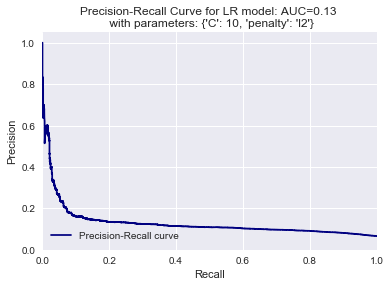

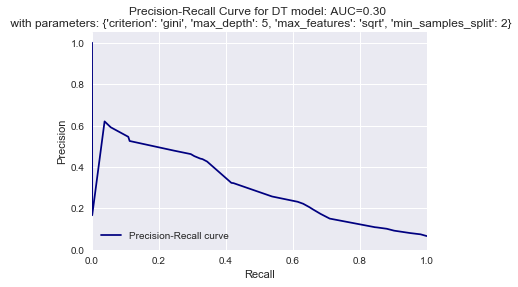

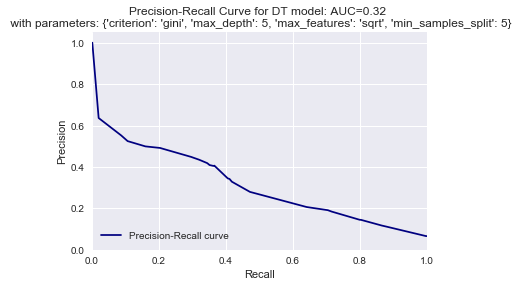

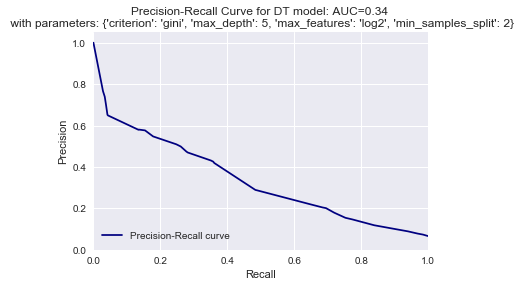

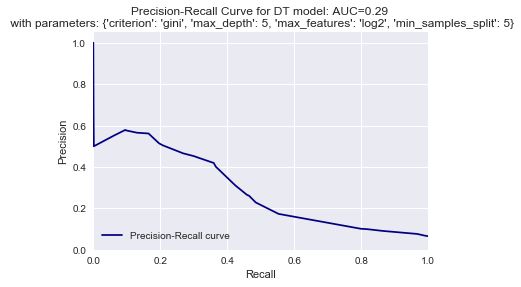

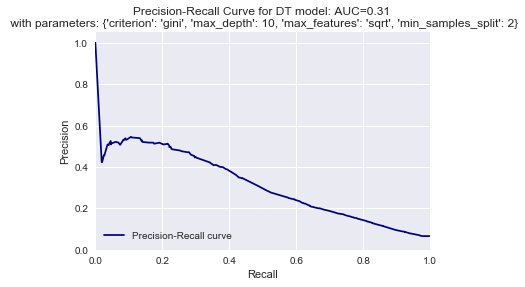

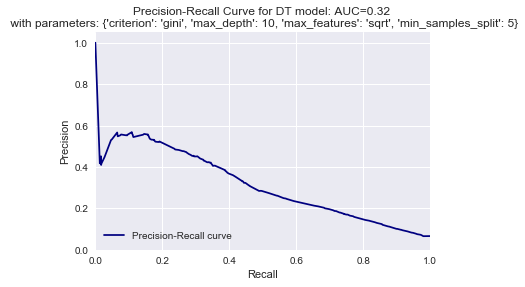

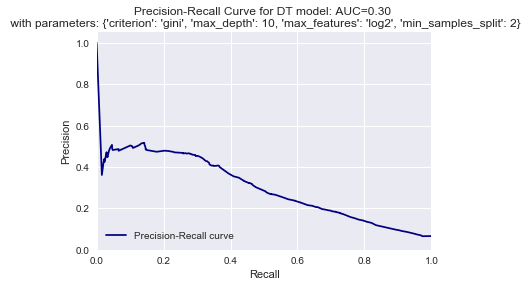

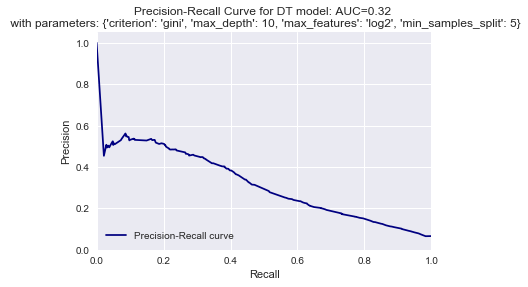

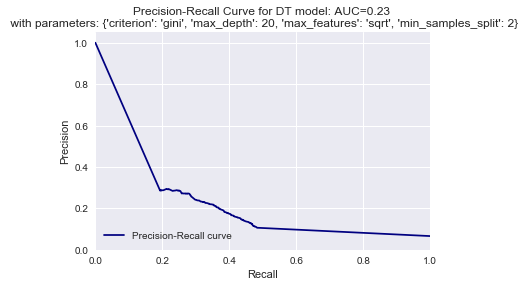

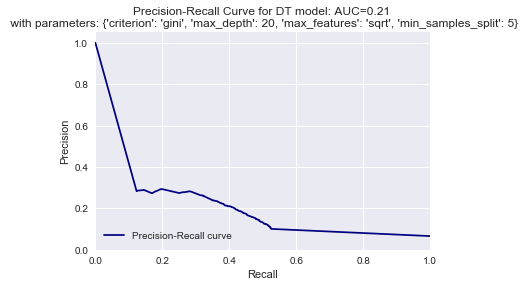

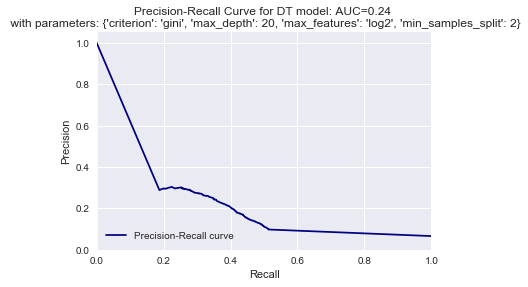

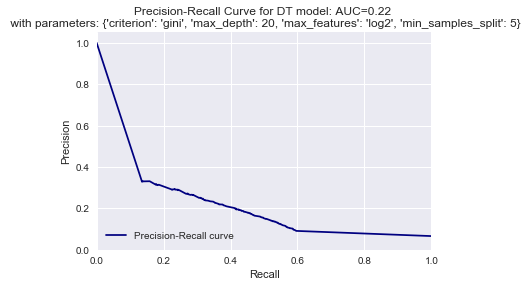

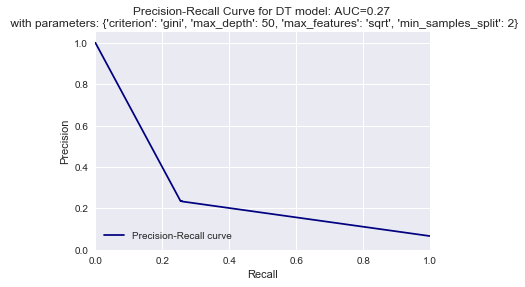

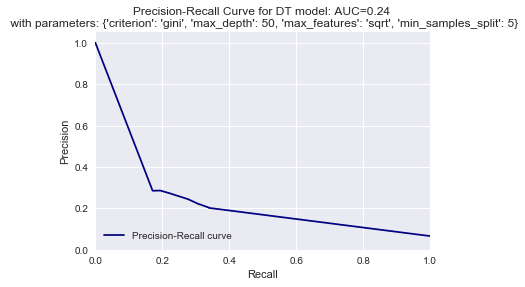

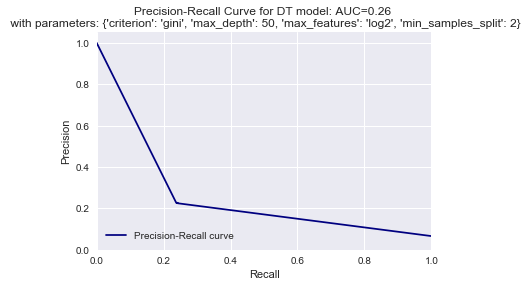

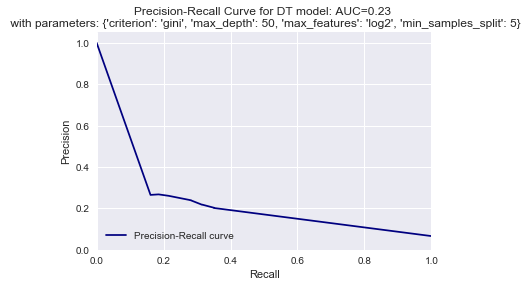

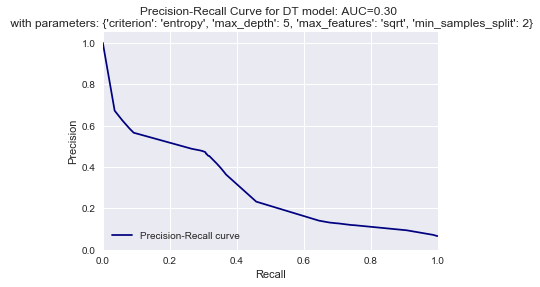

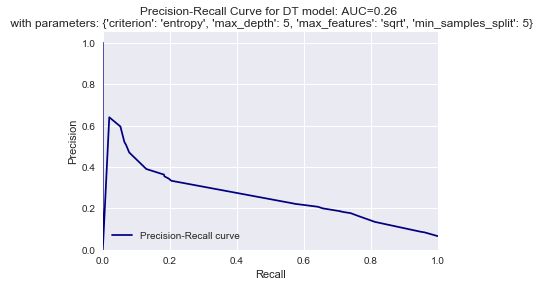

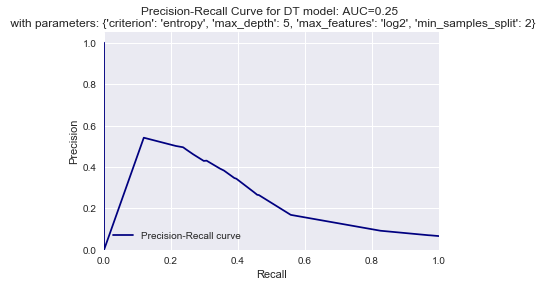

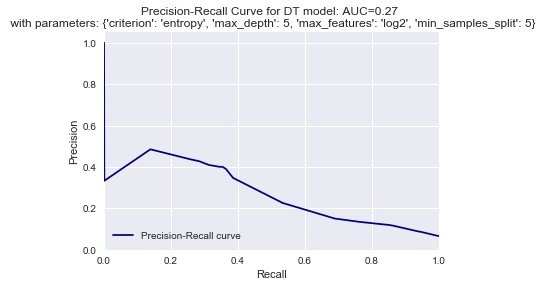

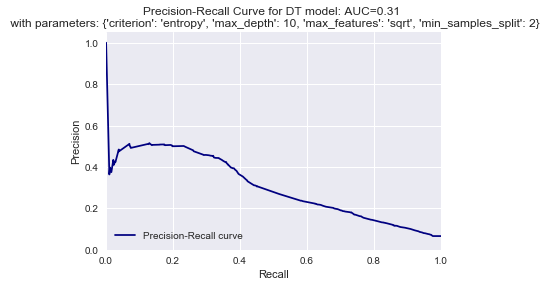

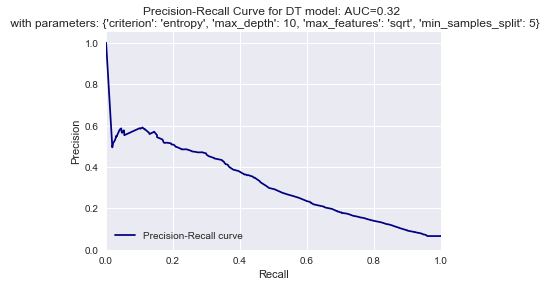

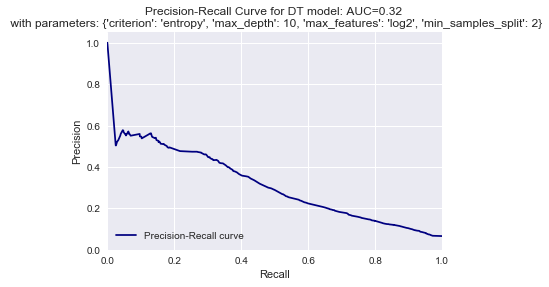

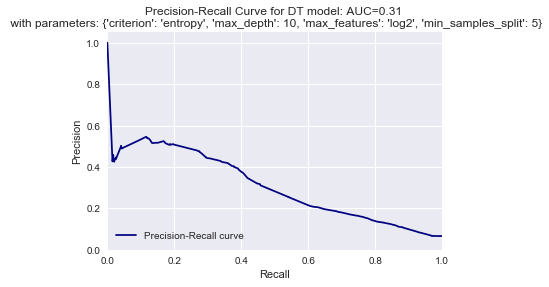

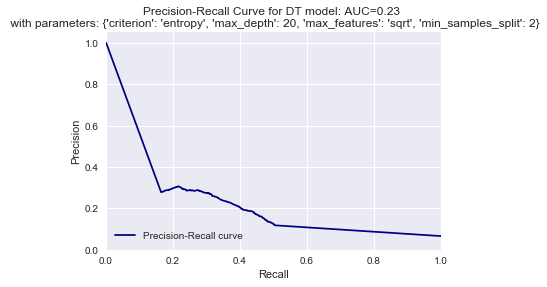

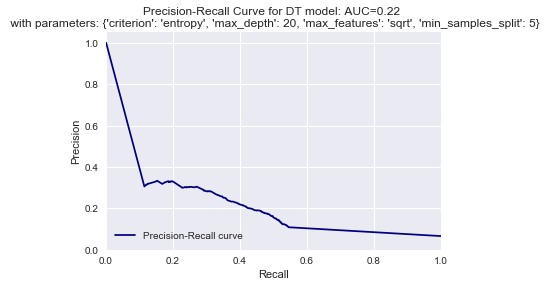

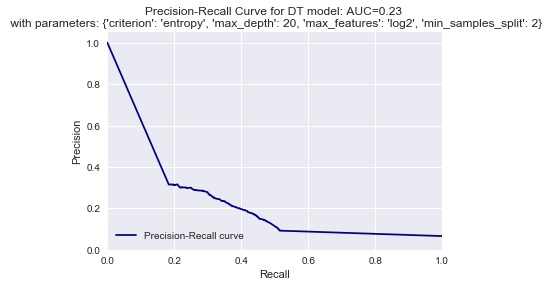

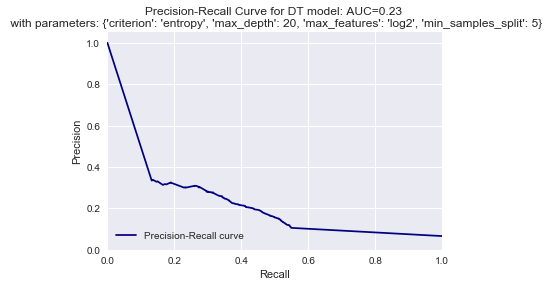

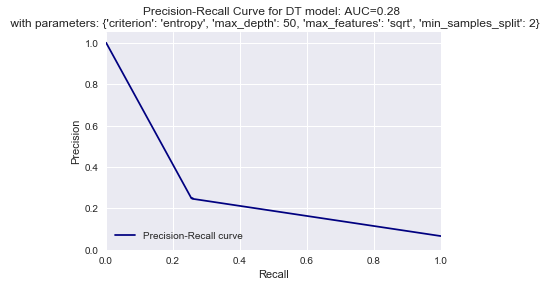

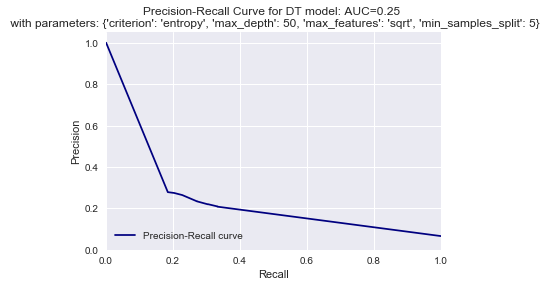

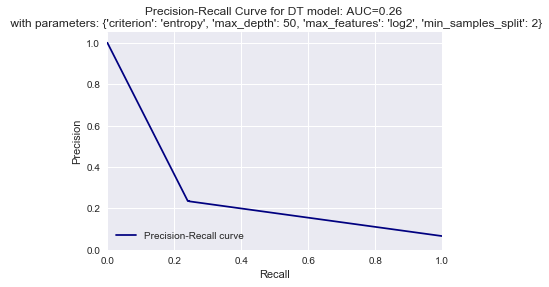

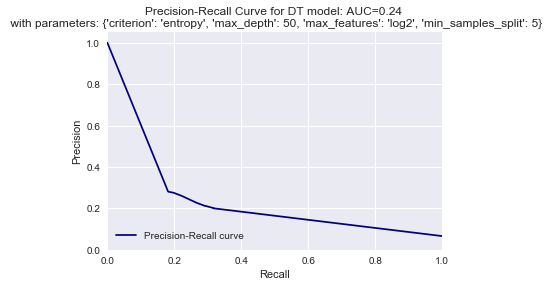

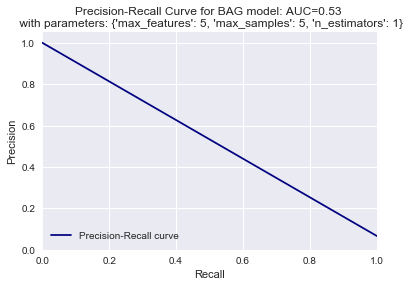

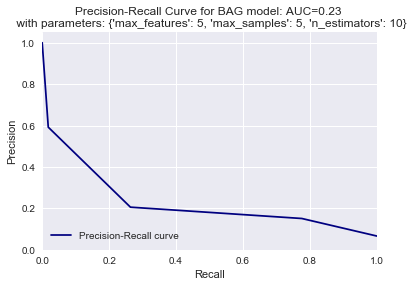

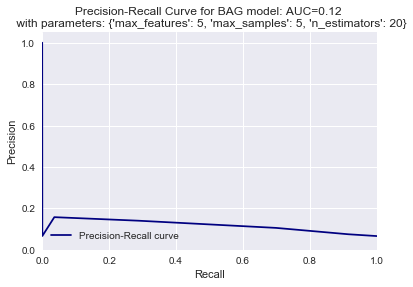

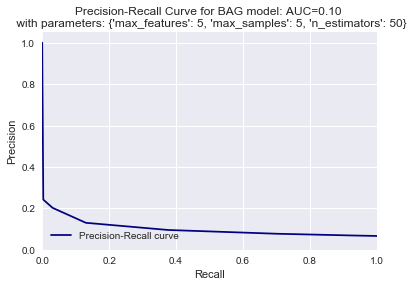

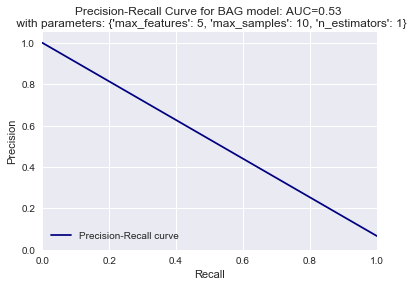

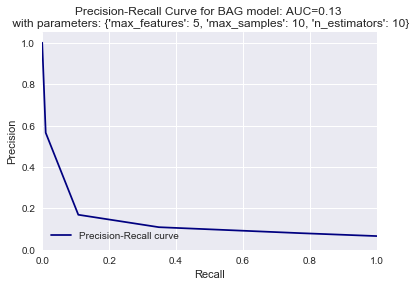

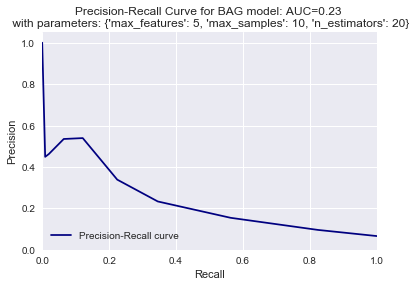

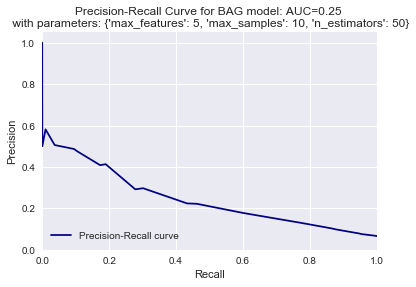

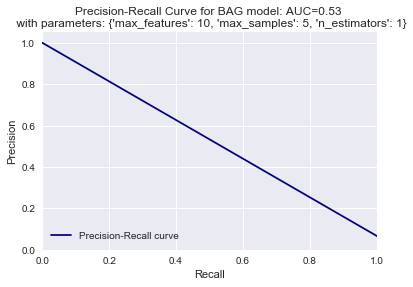

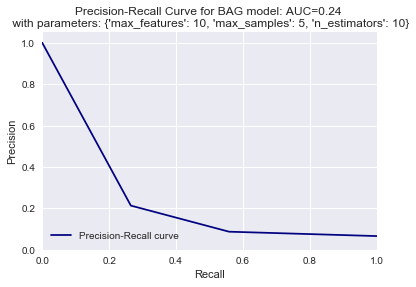

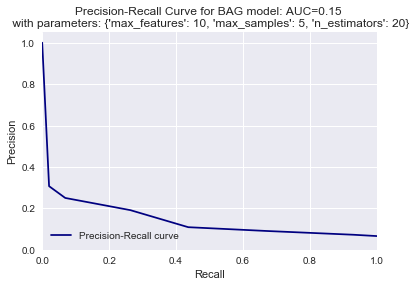

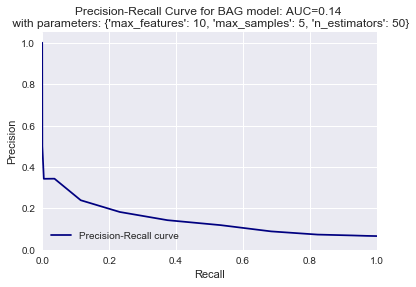

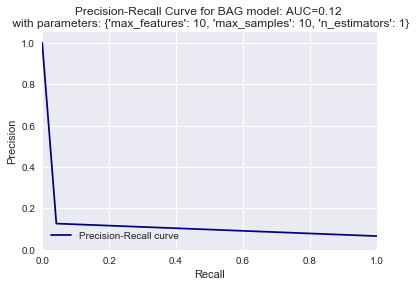

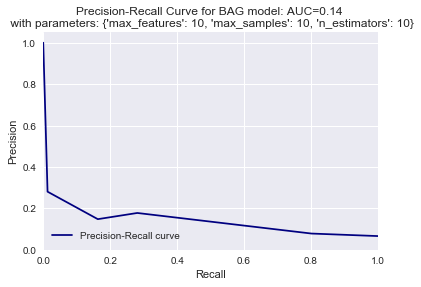

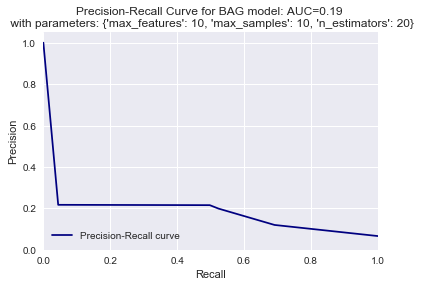

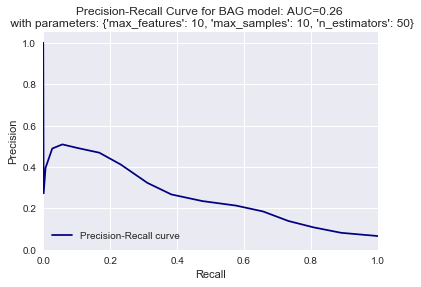

In [7]:
models_to_run = ['RF','AB','KNN','LR','DT','BAG']
X, y = extract_features(df, [1,2,5,7,8,9,11,16,17,18,19], d)
results = clf_loop(models_to_run, X, y)

In [ ]:
#models_to_run = ['SVM']
#results_svm = clf_loop(models_to_run, X, y)

In [8]:
display(results)
results.to_csv('results.csv', index=False)

,model_type,parameters,accuracy,auc-roc,auc-pr,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
0,RF,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.934880,0.822712,0.341764,0.562751,"(0.452266666667, 0.341247484909, 0.388990825688)","(0.318133333333, 0.480080482897, 0.382678428228)","(0.2176, 0.656740442656, 0.326890335503)"
1,RF,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.934880,0.829785,0.353965,5.960065,"(0.454933333333, 0.343259557344, 0.39128440367)","(0.326933333333, 0.493360160966, 0.3932638332)","(0.220666666667, 0.665995975855, 0.331497245869)"
2,RF,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.935013,0.827452,0.347876,0.577427,"(0.4512, 0.340442655936, 0.388073394495)","(0.3216, 0.485311871227, 0.386848436247)","(0.2196, 0.66277665996, 0.329894842263)"
3,RF,"{'max_depth': 5, 'max_features': 'sqrt', 'min_...",0.934853,0.830409,0.353874,9.003715,"(0.451733333333, 0.340845070423, 0.388532110092)","(0.324, 0.48893360161, 0.389735364876)","(0.220133333333, 0.664386317907, 0.330696044066)"
4,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.934453,0.824453,0.341467,0.985455,"(0.448533333333, 0.338430583501, 0.385779816514)","(0.321333333333, 0.48490945674, 0.386527666399)","(0.22, 0.663983903421, 0.330495743615)"
5,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.934107,0.829693,0.354957,8.721068,"(0.453333333333, 0.342052313883, 0.389908256881)","(0.3208, 0.484104627767, 0.385886126704)","(0.221066666667, 0.667203219316, 0.332098147221)"
6,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.934640,0.828830,0.350320,1.033362,"(0.4512, 0.340442655936, 0.388073394495)","(0.324, 0.48893360161, 0.389735364876)","(0.219733333333, 0.663179074447, 0.330095142714)"
7,RF,"{'max_depth': 5, 'max_features': 'log2', 'min_...",0.934800,0.829574,0.354493,6.874923,"(0.452266666667, 0.341247484909, 0.388990825688)","(0.3248, 0.49014084507, 0.390697674419)","(0.2208, 0.666398390342, 0.331697546319)"
8,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.932747,0.740965,0.277849,1.583485,"(0.3984, 0.30060362173, 0.342660550459)","(0.353866666667, 0.534004024145, 0.425661587811)","(0.226666666667, 0.684104627767, 0.340510766149)"
9,RF,"{'max_depth': 50, 'max_features': 'sqrt', 'min...",0.935093,0.802337,0.312111,16.508230,"(0.4192, 0.31629778672, 0.360550458716)","(0.312533333333, 0.471629778672, 0.375942261427)","(0.211733333333, 0.639034205231, 0.318077115674)"


In [10]:
idx = results.groupby(['model_type'])['accuracy'].transform(max) == results['accuracy']
display(results[idx].sort_values('time'))

,model_type,parameters,accuracy,auc-roc,auc-pr,time,"precision,recall,f1 at_5","precision,recall,f1 at_10","precision,recall,f1 at_20"
90,BAG,"{'max_features': 5, 'max_samples': 5, 'n_estimators': 1}",0.933733,0.500000,0.533133,0.038602,"(1.0, 0.75452716297786715, 0.86009174311926606)","(0.66266666666666663, 1.0, 0.79711307137129117)","(0.33133333333333331, 1.0, 0.49774661992989483)"
94,BAG,"{'max_features': 5, 'max_samples': 10, 'n_estimators': 1}",0.933733,0.500000,0.533133,0.054143,"(1.0, 0.75452716297786715, 0.86009174311926606)","(0.66266666666666663, 1.0, 0.79711307137129117)","(0.33133333333333331, 1.0, 0.49774661992989483)"
98,BAG,"{'max_features': 10, 'max_samples': 5, 'n_estimators': 1}",0.933733,0.500000,0.533133,0.063167,"(1.0, 0.75452716297786715, 0.86009174311926606)","(0.66266666666666663, 1.0, 0.79711307137129117)","(0.33133333333333331, 1.0, 0.49774661992989483)"
60,DT,"{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2}",0.936240,0.808677,0.338183,0.097792,"(0.46613333333333334, 0.35171026156941648, 0.40091743119266054)","(0.32079999999999997, 0.48410462776659957, 0.38588612670408978)","(0.22693333333333332, 0.68490945674044268, 0.34091136705057584)"
91,BAG,"{'max_features': 5, 'max_samples': 5, 'n_estimators': 10}",0.933733,0.746522,0.228148,0.178979,"(0.34933333333333333, 0.26358148893360162, 0.30045871559633025)","(0.32613333333333333, 0.49215291750503021, 0.39230152365677629)","(0.25693333333333335, 0.77545271629778667, 0.38597896845267909)"
95,BAG,"{'max_features': 5, 'max_samples': 10, 'n_estimators': 10}",0.933733,0.608488,0.134306,0.233582,"(0.29813333333333331, 0.22494969818913482, 0.25642201834862383)","(0.23093333333333332, 0.34849094567404426, 0.27778668805132317)","(0.11546666666666666, 0.34849094567404426, 0.17346019028542811)"
99,BAG,"{'max_features': 10, 'max_samples': 5, 'n_estimators': 10}",0.933733,0.607728,0.238731,0.259236,"(0.35093333333333332, 0.26478873239436618, 0.30183486238532109)","(0.35333333333333333, 0.53319919517102621, 0.42502004811547717)","(0.18493333333333334, 0.55814889336016094, 0.2778167250876315)"
103,BAG,"{'max_features': 10, 'max_samples': 10, 'n_estimators': 10}",0.933733,0.622028,0.140698,0.259731,"(0.216, 0.16297786720321933, 0.18577981651376146)","(0.18613333333333335, 0.28088531187122734, 0.22389735364875701)","(0.26546666666666668, 0.80120724346076455, 0.39879819729594396)"
92,BAG,"{'max_features': 5, 'max_samples': 5, 'n_estimators': 20}",0.933733,0.661975,0.117871,0.294745,"(0.38133333333333336, 0.28772635814889336, 0.32798165137614682)","(0.19066666666666668, 0.28772635814889336, 0.22935044105854052)","(0.23133333333333334, 0.69818913480885314, 0.34752128192288428)"
96,BAG,"{'max_features': 5, 'max_samples': 10, 'n_estimators': 20}",0.933733,0.721422,0.233178,0.298294,"(0.42026666666666668, 0.31710261569416498, 0.3614678899082569)","(0.24853333333333333, 0.37505030181086518, 0.29895749799518839)","(0.18653333333333333, 0.5629778672032193, 0.28022033049574363)"


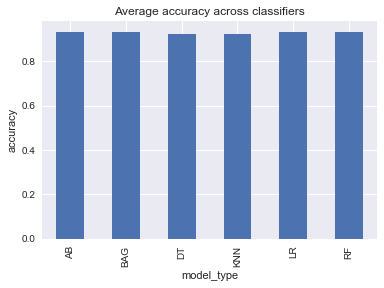

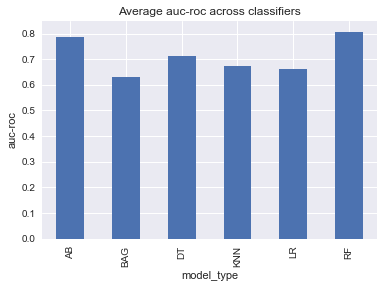

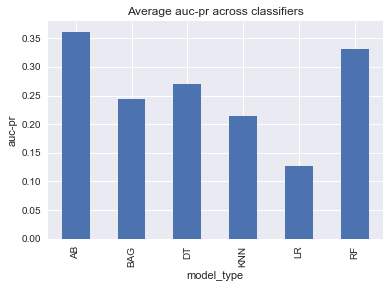

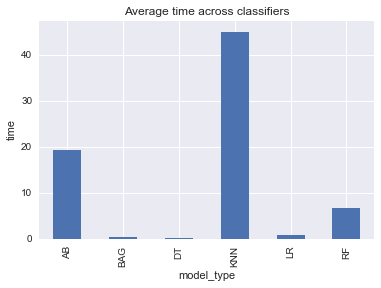

In [12]:
import matplotlib.pyplot as plt
for item in ['accuracy', 'auc-roc','auc-pr','time']:
    plt.figure()
    results.groupby(['model_type'])[item].mean().plot(kind='bar', title='Average '+item+' across classifiers')
    plt.ylabel(item)